In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df1=pd.read_csv(r"D:\dataset\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv(r"D:\dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv(r"D:\dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv(r"D:\dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv(r"D:\dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv(r"D:\dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv(r"D:\dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv(r"D:\dataset/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df.head(50)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [5]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [6]:
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
for column, count in missing_values.items():
    if count != 0:
        print(f"Column '{column}' has {count} missing values, which is {missing_percentage[column]:.2f}% of the total")

Column 'Flow Bytes/s' has 1358 missing values, which is 0.05% of the total


REMOVE THE DUPLICATE VALUES

In [8]:

df= df.drop_duplicates(keep='first')
df.shape

(2522362, 79)

ZERO VALUED COLUMN : means the sum of column==0

In [10]:
zero_columns = [col for col in df.columns if (df[col] == 0).all()]

print("Columns with only zero values:", zero_columns)

Columns with only zero values: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [11]:
identical_columns = {}

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].equals(df[col2]):
            identical_columns.setdefault(col1, []).append(col2)

if identical_columns:
    print("Identical columns found:")
    for col1, duplicates in identical_columns.items():
        print(f"'{col1}' is identical to {duplicates}")
else:
    print("No identical columns found.")


Identical columns found:
' Total Fwd Packets' is identical to ['Subflow Fwd Packets']
' Total Backward Packets' is identical to [' Subflow Bwd Packets']
'Fwd PSH Flags' is identical to [' SYN Flag Count']
' Bwd PSH Flags' is identical to [' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
' Fwd URG Flags' is identical to [' CWE Flag Count']
' Bwd URG Flags' is identical to [' Bwd PSH Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
' Fwd Header Length' is identical to [' Fwd Header Length.1']
' SYN Flag Count' is identical to ['Fwd PSH Flags']
' CWE Flag Count' is identical to [' Fwd URG Flags']
' Fwd Header Length.1' is identical to [' Fwd Header Length']
'Fwd Avg Bytes/Bulk' is identical to [' Bwd PSH Flags', ' Bwd URG Flags', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg By

In [12]:
columns_to_drop = {col for duplicates in identical_columns.values() for col in duplicates}
df=df.drop(columns=columns_to_drop)

print("Updated DataFrame after removing identical columns:")
print(df)

Updated DataFrame after removing identical columns:
         Destination Port   Flow Duration  Total Length of Fwd Packets  \
0                   54865               3                           12   
1                   55054             109                            6   
2                   55055              52                            6   
3                   46236              34                            6   
4                   54863               3                           12   
...                   ...             ...                          ...   
692698                 53           32215                          112   
692699                 53             324                           84   
692700              58030              82                           31   
692701                 53         1048635                          192   
692702                 53           94939                          188   

         Total Length of Bwd Packets   Fwd Packet Length Ma

In [13]:
row_missing_percentage = (df.isna().sum(axis=1) / df.shape[1]) * 100
print(row_missing_percentage.describe())

missing_rows = df.isna().any(axis=1).sum()
print(f'\nTotal rows with missing values: {missing_rows}')

count    2.522362e+06
mean     2.294233e-04
std      1.939204e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.639344e+00
dtype: float64

Total rows with missing values: 353


In [14]:
# Dropping missing values
new_df = df.dropna()
print(f'Dataset shape after row-wise removal: {new_df.shape}')

Dataset shape after row-wise removal: (2522009, 61)


In [15]:
# Checking for infinite values
num_columns = new_df.select_dtypes(include = np.number).columns
has_infinite = np.isinf(new_df[num_columns]).sum()
print(has_infinite[has_infinite > 0])

Flow Bytes/s       1211
 Flow Packets/s    1211
dtype: int64


In [16]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\1412808661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [17]:
nan_rows = new_df[new_df.isna().any(axis=1)]


In [18]:
new_df = new_df.dropna().reset_index(drop=True)

In [19]:
group_mapping = {
    'BENIGN': 'Normal Traffic',
    'DoS Hulk': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'Port Scanning',
    'DoS GoldenEye': 'DoS',
    'FTP-Patator': 'Brute Force',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bots',
    'Web Attack � Brute Force': 'Web Attacks',
    'Web Attack � XSS': 'Web Attacks',
    'Infiltration': 'Infiltration',
    'Web Attack � Sql Injection': 'Web Attacks',
    'Heartbleed': 'Miscellaneous'
}

new_df[' Label']=new_df[' Label'].map(group_mapping)

In [20]:
new_df[' Label'].value_counts()

 Label
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Infiltration           36
Miscellaneous          11
Name: count, dtype: int64

In [21]:
new_df.columns

Index([' Destination Port', ' Flow Duration', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Average Pa

In [22]:
label_counts=new_df[' Label'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\836821642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


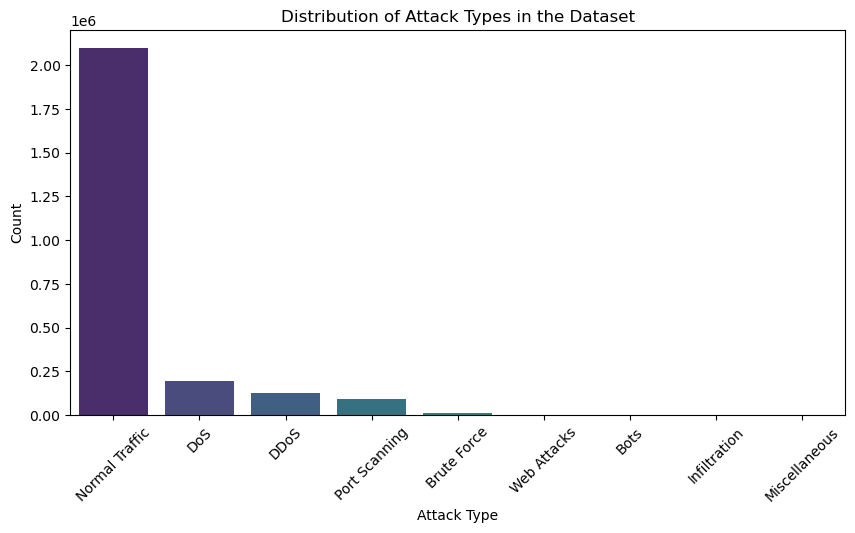

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types in the Dataset")
plt.show()

In [24]:
attack_label_mapping = {
    "Normal Traffic": 0,
    "DoS": 1,
    "DDoS": 2,
    "Port Scanning": 3,
    "Brute Force": 4,
    "Web Attacks": 5,
    "Bots": 6,
    "Infiltration": 7,
    "Miscellaneous": 8
}

print("Attack Types and Corresponding Labels:\n")
for attack, label in attack_label_mapping.items():
    print(f"Label {label}: {attack}")

Attack Types and Corresponding Labels:

Label 0: Normal Traffic
Label 1: DoS
Label 2: DDoS
Label 3: Port Scanning
Label 4: Brute Force
Label 5: Web Attacks
Label 6: Bots
Label 7: Infiltration
Label 8: Miscellaneous


In [25]:
new_df[' Label']

0          Normal Traffic
1          Normal Traffic
2          Normal Traffic
3          Normal Traffic
4          Normal Traffic
                ...      
2520793    Normal Traffic
2520794    Normal Traffic
2520795    Normal Traffic
2520796    Normal Traffic
2520797    Normal Traffic
Name:  Label, Length: 2520798, dtype: object

In [26]:
attack_label_mapping = {
    "Normal Traffic": 0,
    "DoS": 1,
    "DDoS": 2,
    "Port Scanning": 3,
    "Brute Force": 4,
    "Web Attacks": 5,
    "Bots": 6,
    "Infiltration": 7,
    "Miscellaneous": 8
}
new_df['Label'] = new_df[' Label'].map(attack_label_mapping)


In [27]:
new_df['Label'].value_counts()

Label
0    2095057
1     193745
2     128014
3      90694
4       9150
5       2143
6       1948
7         36
8         11
Name: count, dtype: int64

In [28]:
numeric_df = new_df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

# Compute the correlation matrices
corr_matrix_pearson = numeric_df.corr(method="pearson")

# Display results
print("Spearman Correlation:\n", corr_matrix_pearson.head())

Spearman Correlation:
                                Destination Port   Flow Duration  \
 Destination Port                      1.000000       -0.171653   
 Flow Duration                        -0.171653        1.000000   
Total Length of Fwd Packets            0.009662        0.063497   
 Total Length of Bwd Packets          -0.003386        0.015997   
 Fwd Packet Length Max                 0.091295        0.263341   

                              Total Length of Fwd Packets  \
 Destination Port                                0.009662   
 Flow Duration                                   0.063497   
Total Length of Fwd Packets                      1.000000   
 Total Length of Bwd Packets                     0.353782   
 Fwd Packet Length Max                           0.196238   

                               Total Length of Bwd Packets  \
 Destination Port                                -0.003386   
 Flow Duration                                    0.015997   
Total Length of Fwd P

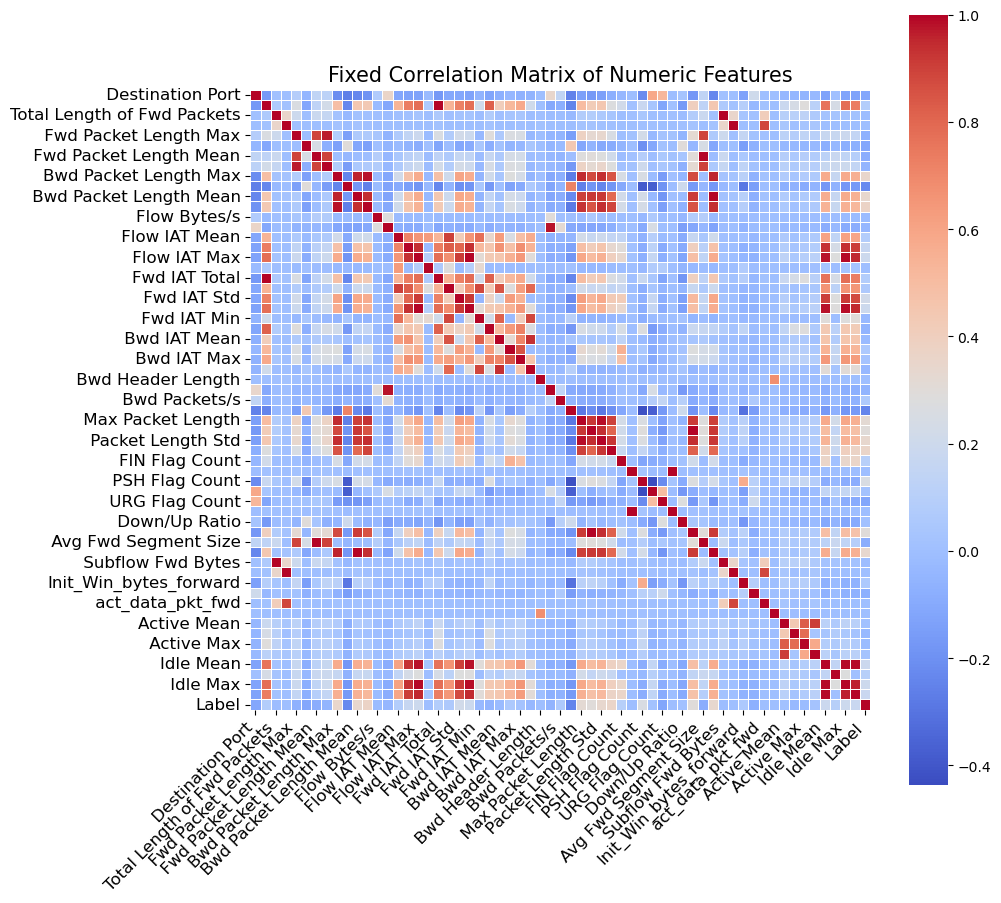

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_pearson, annot=False, cmap="coolwarm", linewidths=0.5, square=True)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Fixed Correlation Matrix of Numeric Features", fontsize=15)

plt.show()

In [30]:
#firstly convert the flow duration into datetime
new_df[' Flow Duration'] = pd.to_datetime(new_df[' Flow Duration'])

new_df


,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
0,54865,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
1,55054,1970-01-01 00:00:00.000000109,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2,55055,1970-01-01 00:00:00.000000052,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
3,46236,1970-01-01 00:00:00.000000034,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
4,54863,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,1970-01-01 00:00:00.000032215,112,152,28,28,28.0,0.00000,76,76,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520794,53,1970-01-01 00:00:00.000000324,84,362,42,42,42.0,0.00000,181,181,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520795,58030,1970-01-01 00:00:00.000000082,31,6,31,0,15.5,21.92031,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520796,53,1970-01-01 00:00:00.001048635,192,256,32,32,32.0,0.00000,128,128,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0


In [31]:
new_df['Flow Date'] = new_df[' Flow Duration'].dt.date

In [32]:
#firstly convert the flow duration into datetime
new_df[' Flow Duration'] = pd.to_datetime(new_df[' Flow Duration'])

new_df


,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label,Flow Date
0,54865,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
1,55054,1970-01-01 00:00:00.000000109,6,6,6,6,6.0,0.00000,6,6,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
2,55055,1970-01-01 00:00:00.000000052,6,6,6,6,6.0,0.00000,6,6,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
3,46236,1970-01-01 00:00:00.000000034,6,6,6,6,6.0,0.00000,6,6,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
4,54863,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,1970-01-01 00:00:00.000032215,112,152,28,28,28.0,0.00000,76,76,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
2520794,53,1970-01-01 00:00:00.000000324,84,362,42,42,42.0,0.00000,181,181,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
2520795,58030,1970-01-01 00:00:00.000000082,31,6,31,0,15.5,21.92031,6,6,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01
2520796,53,1970-01-01 00:00:00.001048635,192,256,32,32,32.0,0.00000,128,128,...,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0,1970-01-01


In [33]:
new_df.drop(columns=['Flow Date'])

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
0,54865,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
1,55054,1970-01-01 00:00:00.000000109,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2,55055,1970-01-01 00:00:00.000000052,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
3,46236,1970-01-01 00:00:00.000000034,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
4,54863,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,1970-01-01 00:00:00.000032215,112,152,28,28,28.0,0.00000,76,76,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520794,53,1970-01-01 00:00:00.000000324,84,362,42,42,42.0,0.00000,181,181,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520795,58030,1970-01-01 00:00:00.000000082,31,6,31,0,15.5,21.92031,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0
2520796,53,1970-01-01 00:00:00.001048635,192,256,32,32,32.0,0.00000,128,128,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal Traffic,0


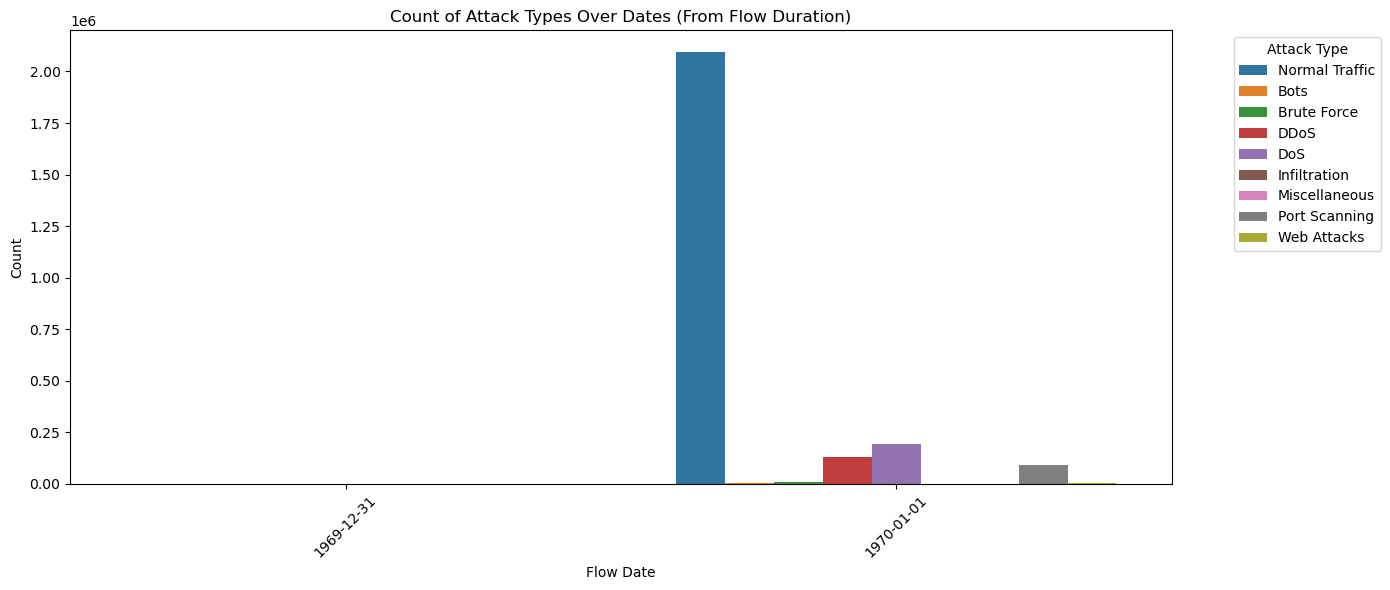

In [34]:


# Convert Flow Duration to datetime and extract date
new_df[" Flow Duration"] = pd.to_datetime(new_df[" Flow Duration"], errors='coerce')
new_df["Flow Date"] = new_df[" Flow Duration"].dt.date

# Group by Flow Date and Attack Type
grouped = new_df.groupby(["Flow Date", " Label"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="Flow Date", y="Count", hue=" Label")

plt.ylabel("Count")
plt.xlabel("Flow Date")
plt.title("Count of Attack Types Over Dates (From Flow Duration)")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
new_df.describe()

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.520798e+06,2520798,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1970-01-01 00:00:00.016591611,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,...,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,3.099011e-01
min,0.000000e+00,1969-12-31 23:59:59.999999987,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1970-01-01 00:00:00.000000208,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,1970-01-01 00:00:00.000050622,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,9.700000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,1970-01-01 00:00:00.005333340,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,7.460000e+02,8.200000e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1970-01-01 00:00:00.119999998,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,2.896000e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,8.000000e+00
std,1.901280e+04,NaN,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,...,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07,7.847841e-01


In [36]:
mean_values = new_df.mean(numeric_only=True)
print(mean_values)


 Destination Port               8.690590e+03
Total Length of Fwd Packets     6.119477e+02
 Total Length of Bwd Packets    1.814440e+04
 Fwd Packet Length Max          2.312292e+02
 Fwd Packet Length Min          1.920349e+01
 Fwd Packet Length Mean         6.350497e+01
 Fwd Packet Length Std          7.732347e+01
Bwd Packet Length Max           9.749726e+02
 Bwd Packet Length Min          4.315945e+01
 Bwd Packet Length Mean         3.406225e+02
 Bwd Packet Length Std          3.765453e+02
Flow Bytes/s                    1.410707e+06
 Flow Packets/s                 4.729188e+04
 Flow IAT Mean                  1.446142e+06
 Flow IAT Std                   3.278153e+06
 Flow IAT Max                   1.029948e+07
 Flow IAT Min                   1.704214e+05
Fwd IAT Total                   1.625184e+07
 Fwd IAT Mean                   2.919257e+06
 Fwd IAT Std                    3.668641e+06
 Fwd IAT Max                    1.014294e+07
 Fwd IAT Min                    1.135671e+06
Bwd IAT To

In [37]:
print("Max Mean:", mean_values.max())
print("Min Mean:", mean_values.min())
print("Difference (Range):", mean_values.max() - mean_values.min())


Max Mean: 16251836.019270882
Min Mean: -3082.2332253516547
Difference (Range): 16254918.252496233


In [38]:
mean_values.sort_values(ascending=False)


Fwd IAT Total                   1.625184e+07
Bwd IAT Total                   1.111025e+07
 Flow IAT Max                   1.029948e+07
 Fwd IAT Max                    1.014294e+07
 Idle Max                       9.763770e+06
Idle Mean                       9.337367e+06
 Idle Min                       8.892671e+06
 Bwd IAT Max                    5.260619e+06
 Fwd IAT Std                    3.668641e+06
 Flow IAT Std                   3.278153e+06
 Fwd IAT Mean                   2.919257e+06
 Bwd IAT Mean                   2.027734e+06
 Bwd IAT Std                    1.668681e+06
 Flow IAT Mean                  1.446142e+06
Flow Bytes/s                    1.410707e+06
 Fwd IAT Min                    1.135671e+06
 Bwd IAT Min                    1.086111e+06
 Idle Std                       5.657941e+05
 Packet Length Variance         5.457761e+05
 Active Max                     1.720171e+05
 Flow IAT Min                   1.704214e+05
Active Mean                     9.157847e+04
 Active Mi

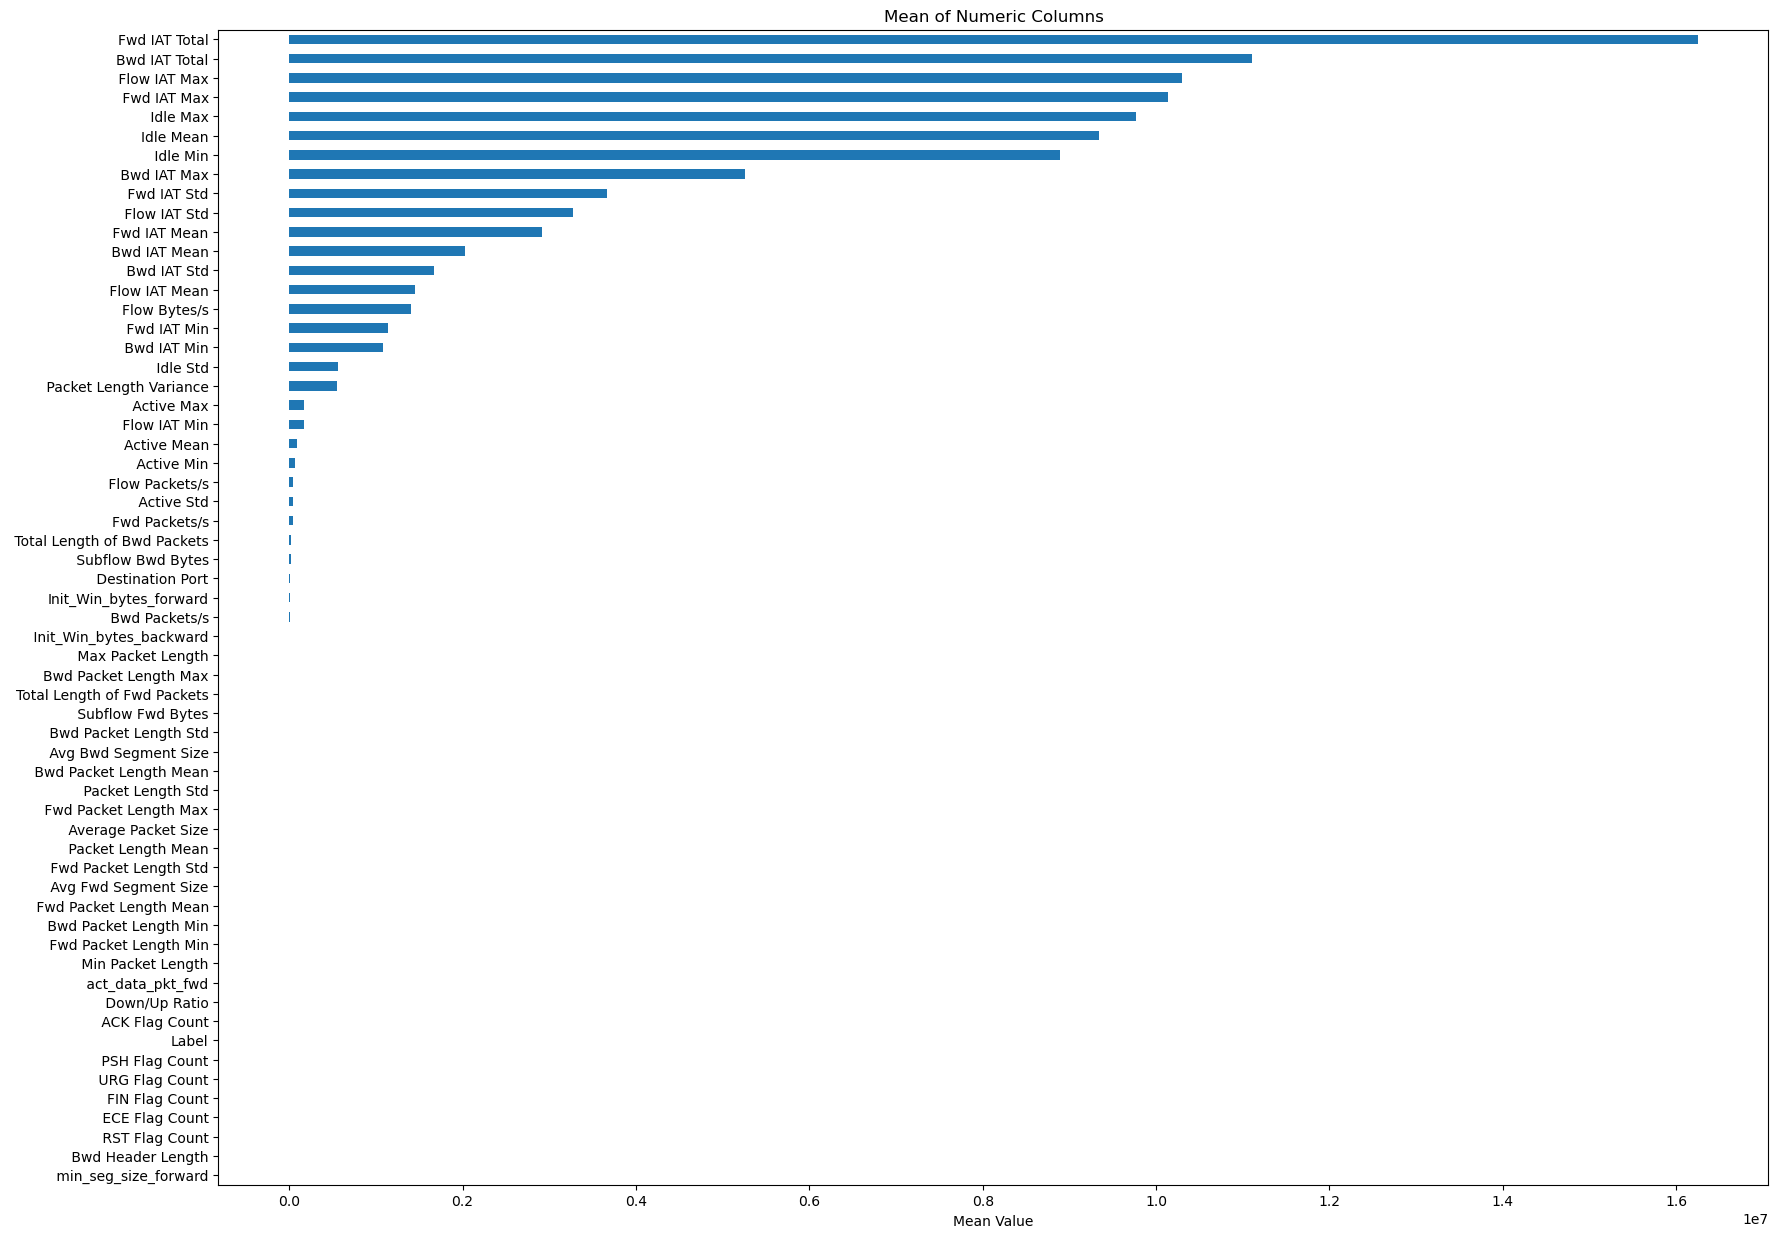

In [39]:
import matplotlib.pyplot as plt

mean_values.sort_values().plot(kind='barh', figsize=(20, 15))
plt.title('Mean of Numeric Columns')
plt.xlabel('Mean Value')
plt.show()


In [40]:
exclude_cols = ['Label', 'Destination Port','Flow Duration']  
numeric_means = new_df.mean(numeric_only=True)        # Get mean of all numeric columns
max_mean_col = numeric_means.idxmax()                 # Find the column with the maximum mean
exclude_cols.append(max_mean_col)                     # Exclude it from normalization


In [41]:
max_mean_col


'Fwd IAT Total'

In [42]:
new_df.columns

Index([' Destination Port', ' Flow Duration', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Average Pa

In [43]:
new_df.drop(columns=[' Label','Flow Date'])

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,1970-01-01 00:00:00.000000109,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,1970-01-01 00:00:00.000000052,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,1970-01-01 00:00:00.000000034,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,1970-01-01 00:00:00.000000003,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,1970-01-01 00:00:00.000032215,112,152,28,28,28.0,0.00000,76,76,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2520794,53,1970-01-01 00:00:00.000000324,84,362,42,42,42.0,0.00000,181,181,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2520795,58030,1970-01-01 00:00:00.000000082,31,6,31,0,15.5,21.92031,6,6,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2520796,53,1970-01-01 00:00:00.001048635,192,256,32,32,32.0,0.00000,128,128,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [44]:
new_df.describe()

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.520798e+06,2520798,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1970-01-01 00:00:00.016591611,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,...,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,3.099011e-01
min,0.000000e+00,1969-12-31 23:59:59.999999987,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1970-01-01 00:00:00.000000208,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,1970-01-01 00:00:00.000050622,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,9.700000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,1970-01-01 00:00:00.005333340,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,7.460000e+02,8.200000e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1970-01-01 00:00:00.119999998,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,2.896000e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,8.000000e+00
std,1.901280e+04,NaN,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,...,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07,7.847841e-01


take the DOS attack as target value: normal traffic(0) and DOS(1)

In [46]:
anomaly_data = new_df[new_df['Label'] == 1]
print(anomaly_data.head())  # show first few anomaly rows
print(f"Total anomalies (DoS): {len(anomaly_data)}")

          Destination Port                 Flow Duration  \
1936609                 80 1970-01-01 00:00:00.005169956   
1955601                 80 1970-01-01 00:00:00.000000229   
1955602                 80 1970-01-01 00:00:00.005001928   
1955603                 80 1970-01-01 00:00:00.005125872   
1955604                 80 1970-01-01 00:00:00.000000214   

         Total Length of Fwd Packets   Total Length of Bwd Packets  \
1936609                         1101                          4222   
1955601                           12                             0   
1955602                           12                             0   
1955603                         1659                          2514   
1955604                           12                             0   

          Fwd Packet Length Max   Fwd Packet Length Min  \
1936609                     410                       0   
1955601                       6                       6   
1955602                       6          

In [47]:
normal_traf =new_df[new_df['Label'] == 0].describe()
dos_attack = new_df[new_df['Label'] == 1].describe()

print("Normal Traffic Stats:\n", normal_traf)
print("\nDoS Traffic Stats:\n", dos_attack)

Normal Traffic Stats:
         Destination Port                  Flow Duration  \
count       2.095057e+06                        2095057   
mean        1.005851e+04  1970-01-01 00:00:00.012160238   
min         0.000000e+00  1969-12-31 23:59:59.999999987   
25%         5.300000e+01  1970-01-01 00:00:00.000000203   
50%         8.000000e+01  1970-01-01 00:00:00.000039979   
75%         4.430000e+02  1970-01-01 00:00:00.001097895   
max         6.553500e+04  1970-01-01 00:00:00.119999998   
std         2.032511e+04                            NaN   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                 2.095057e+06                  2.095057e+06   
mean                  6.839212e+02                  2.044406e+04   
min                   0.000000e+00                  0.000000e+00   
25%                   1.800000e+01                  6.000000e+00   
50%                   6.800000e+01                  1.440000e+02   
75%                   2.080000e+02   

DOS VISUALIZATION

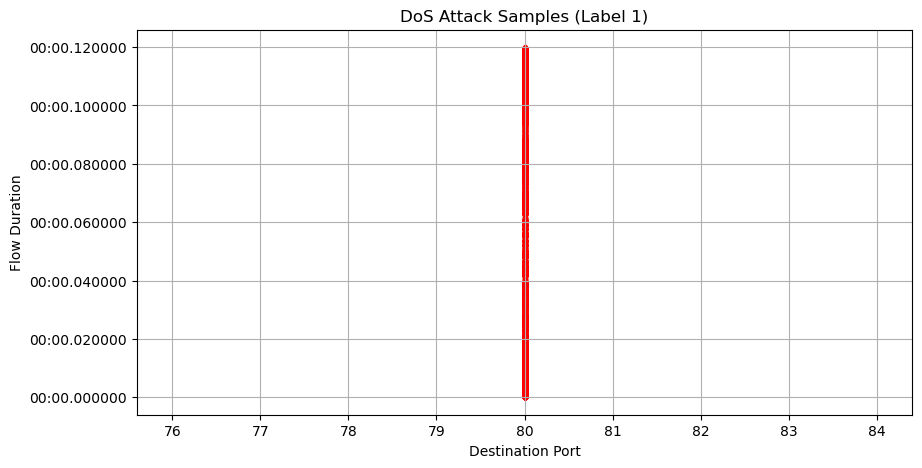

In [49]:
dos_df = new_df[new_df['Label'] == 1]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(dos_df[' Destination Port'], dos_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('DoS Attack Samples (Label 1)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

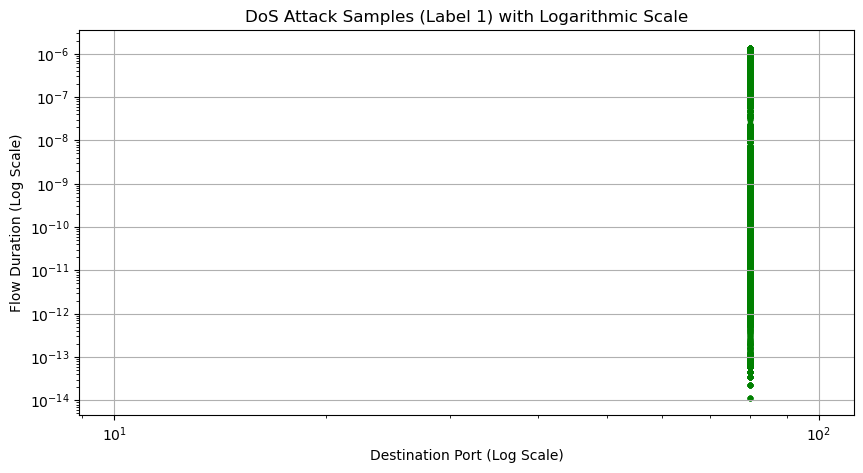

In [50]:
import matplotlib.pyplot as plt

# Filter the DataFrame for DoS (Label == 1)
dos_df = new_df[new_df['Label'] == 1]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(dos_df[' Destination Port'], dos_df[' Flow Duration'], s=10, color='green', alpha=0.5)

# Apply logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

# Title and labels
plt.title('DoS Attack Samples (Label 1) with Logarithmic Scale')
plt.xlabel('Destination Port (Log Scale)')
plt.ylabel('Flow Duration (Log Scale)')
plt.grid(True)

# Show the plot
plt.show()


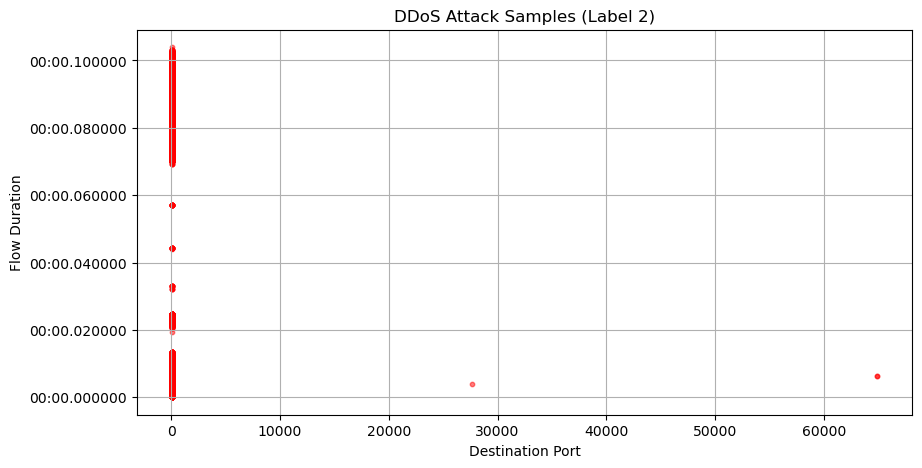

In [51]:
ddos_df = new_df[new_df['Label'] == 2]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(ddos_df[' Destination Port'], ddos_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('DDoS Attack Samples (Label 2)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

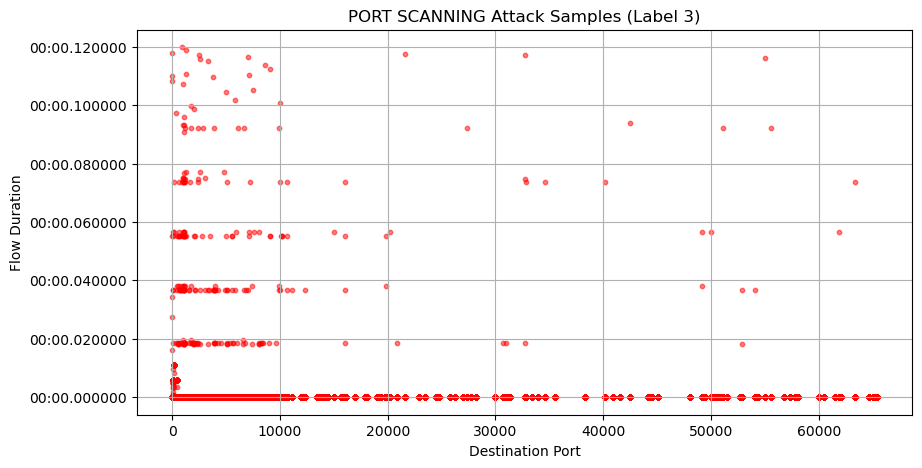

In [52]:
PORT_df = new_df[new_df['Label'] == 3]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(PORT_df[' Destination Port'], PORT_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('PORT SCANNING Attack Samples (Label 3)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

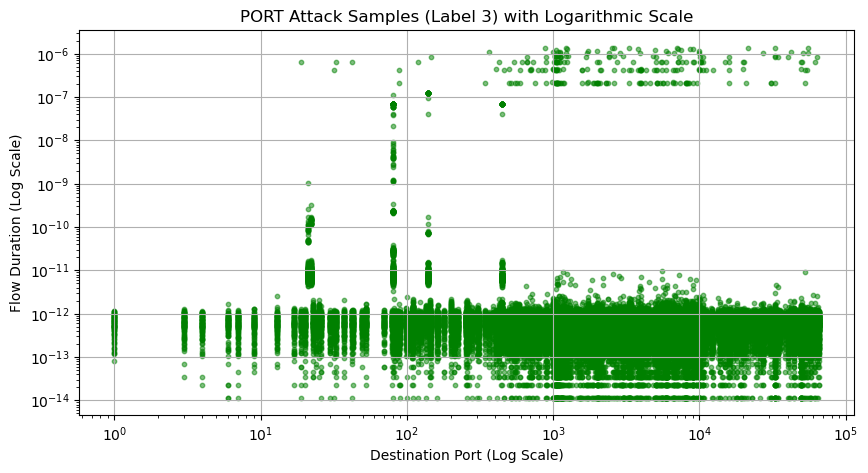

In [53]:
import matplotlib.pyplot as plt

# Filter the DataFrame for PORT Attack (Label == 3)
PORT_df = new_df[new_df['Label'] == 3]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(PORT_df[' Destination Port'], PORT_df[' Flow Duration'], s=10, color='green', alpha=0.5)

# Apply logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

# Title and labels
plt.title('PORT Attack Samples (Label 3) with Logarithmic Scale')
plt.xlabel('Destination Port (Log Scale)')
plt.ylabel('Flow Duration (Log Scale)')
plt.grid(True)

# Show the plot
plt.show()


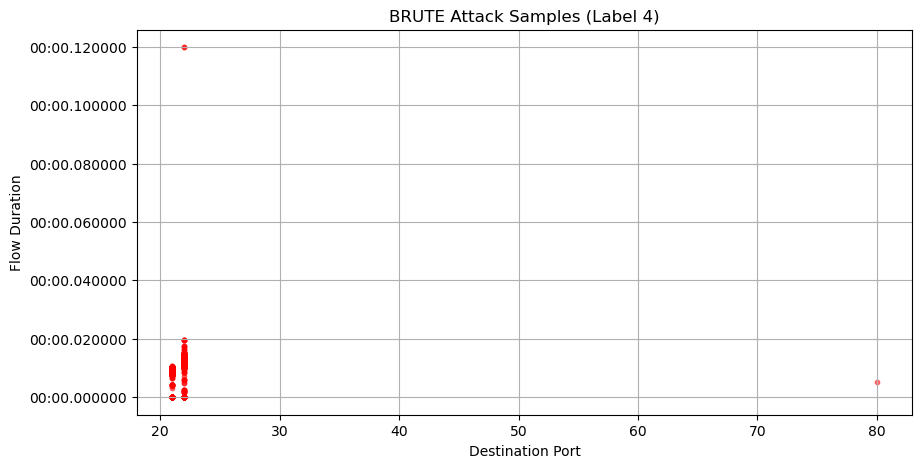

In [54]:
BRUTE_df = new_df[new_df['Label'] == 4]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(BRUTE_df[' Destination Port'], BRUTE_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('BRUTE Attack Samples (Label 4)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

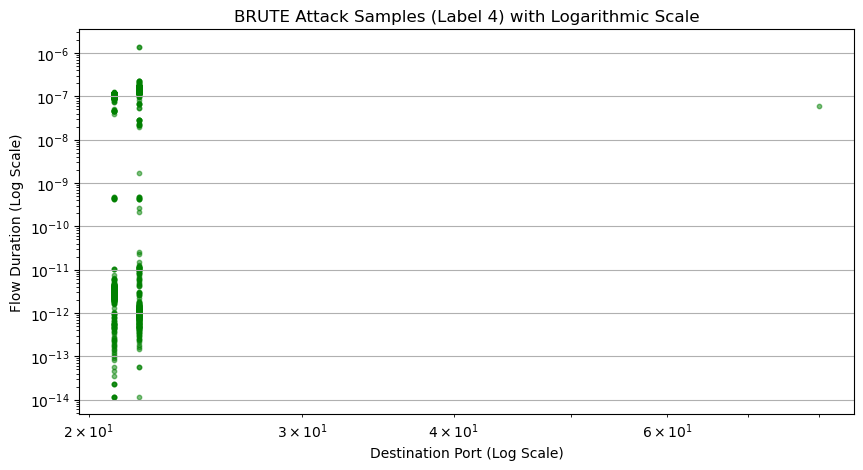

In [55]:
import matplotlib.pyplot as plt

# Filter the DataFrame for BRUTE Force Attack (Label == 4)
BRUTE_df = new_df[new_df['Label'] == 4]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(BRUTE_df[' Destination Port'], BRUTE_df[' Flow Duration'], s=10, color='green', alpha=0.5)

# Apply logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

# Title and labels
plt.title('BRUTE Attack Samples (Label 4) with Logarithmic Scale')
plt.xlabel('Destination Port (Log Scale)')
plt.ylabel('Flow Duration (Log Scale)')
plt.grid(True)

# Show the plot
plt.show()


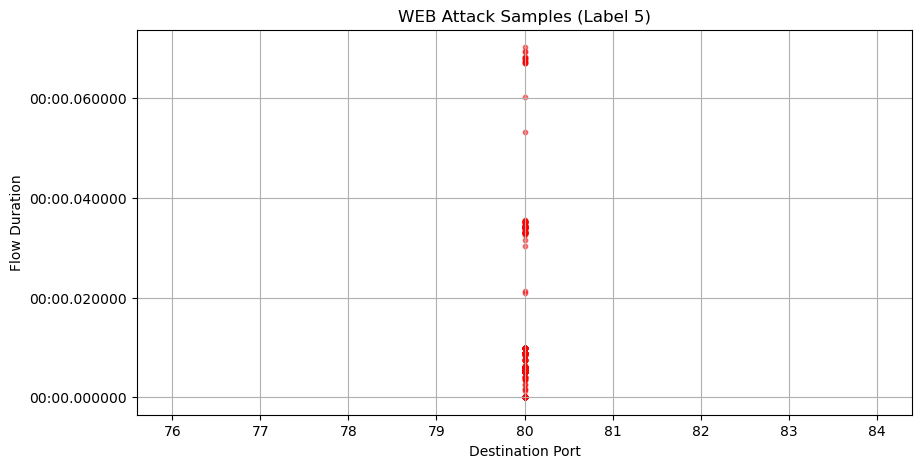

In [56]:
WEB_df = new_df[new_df['Label'] == 5]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(WEB_df[' Destination Port'], WEB_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('WEB Attack Samples (Label 5)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

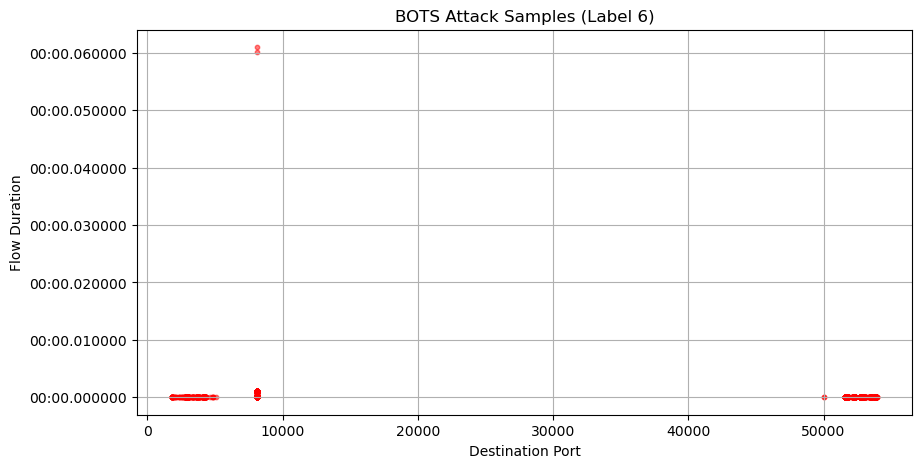

In [57]:
BOTS_df = new_df[new_df['Label'] == 6]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(BOTS_df[' Destination Port'], BOTS_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('BOTS Attack Samples (Label 6)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

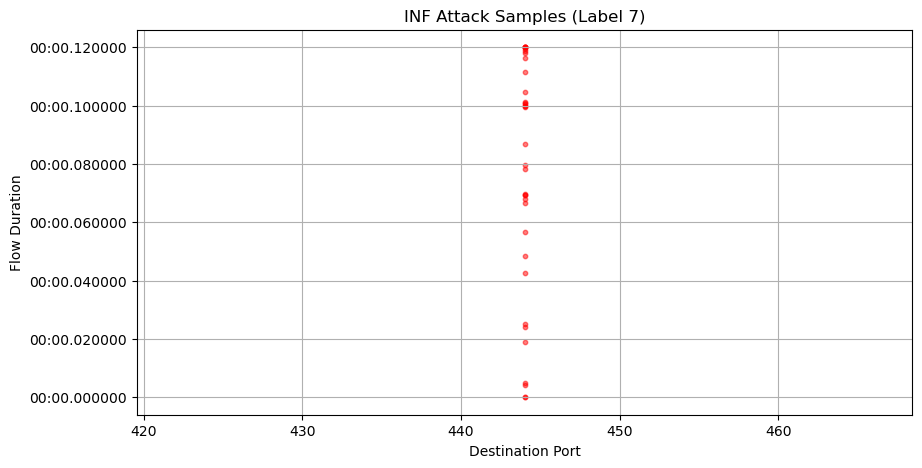

In [58]:
INF_df = new_df[new_df['Label'] == 7]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(INF_df[' Destination Port'], INF_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('INF Attack Samples (Label 7)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

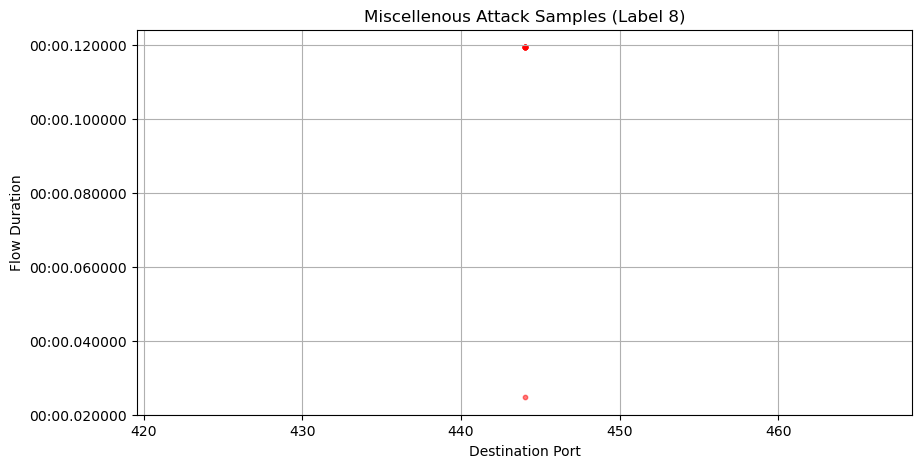

In [59]:
MIS_df = new_df[new_df['Label'] == 8]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(MIS_df[' Destination Port'], MIS_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('Miscellenous Attack Samples (Label 8)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

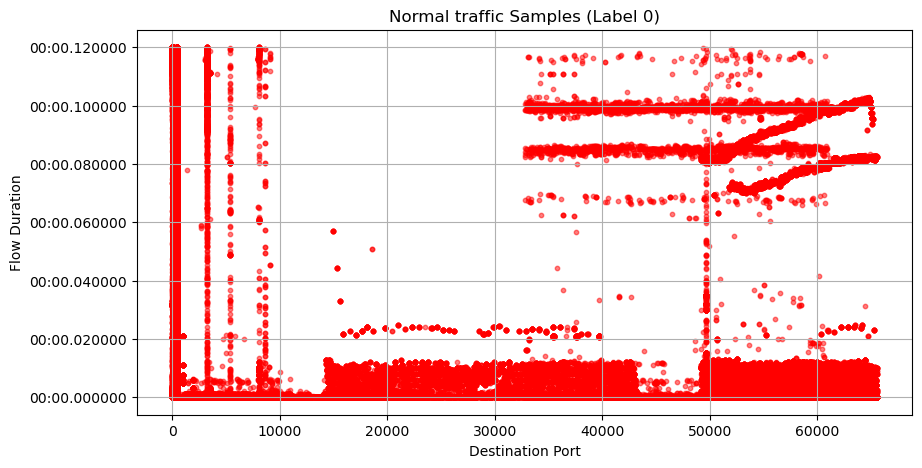

In [117]:
MIS_df = new_df[new_df['Label'] == 0]

# Scatter plot (dots)
plt.figure(figsize=(10, 5))
plt.scatter(MIS_df[' Destination Port'], MIS_df[' Flow Duration'], s=10, color='red', alpha=0.5)
plt.title('Normal traffic Samples (Label 8)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.show()

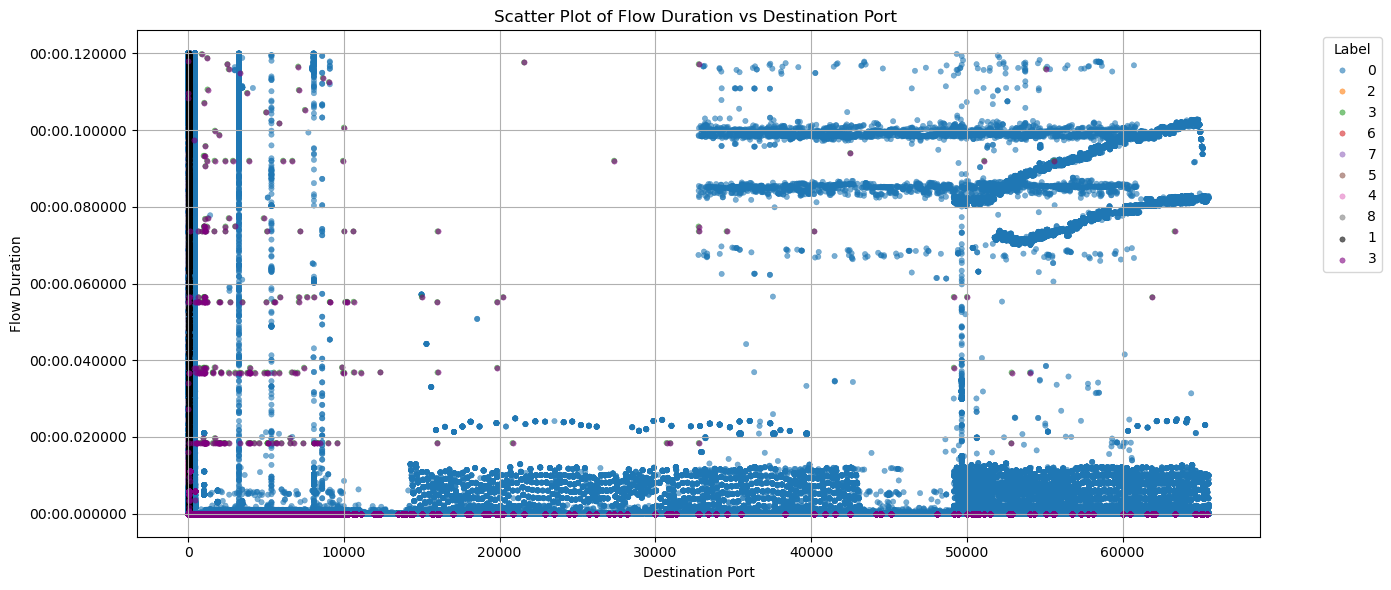

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Convert Label column to string for consistency
new_df['Label'] = new_df['Label'].astype(str)

# Separate Label = 1 from the rest
label_1_df = new_df[new_df['Label'] == '1']
label_2_df = new_df[new_df['Label'] == '3']
other_labels_df = new_df[new_df['Label'] != '1']

# Plot other labels with seaborn's default palette
sns.scatterplot(
    data=other_labels_df,
    x=' Destination Port',
    y=' Flow Duration',
    hue='Label',
    palette='tab10',
    s=15,
    alpha=0.6,
    edgecolor=None,
    legend='full'
)

# Plot Label = 1 with black color
sns.scatterplot(
    data=label_1_df,
    x=' Destination Port',
    y=' Flow Duration',
    color='black',
    label='1',
    s=15,
    alpha=0.6,
    edgecolor=None
)
sns.scatterplot(
    data=label_2_df,
    x=' Destination Port',
    y=' Flow Duration',
    color='purple',
    label='3',
    s=15,
    alpha=0.6,
    edgecolor=None
)

# Title and axis labels
plt.title('Scatter Plot of Flow Duration vs Destination Port ')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


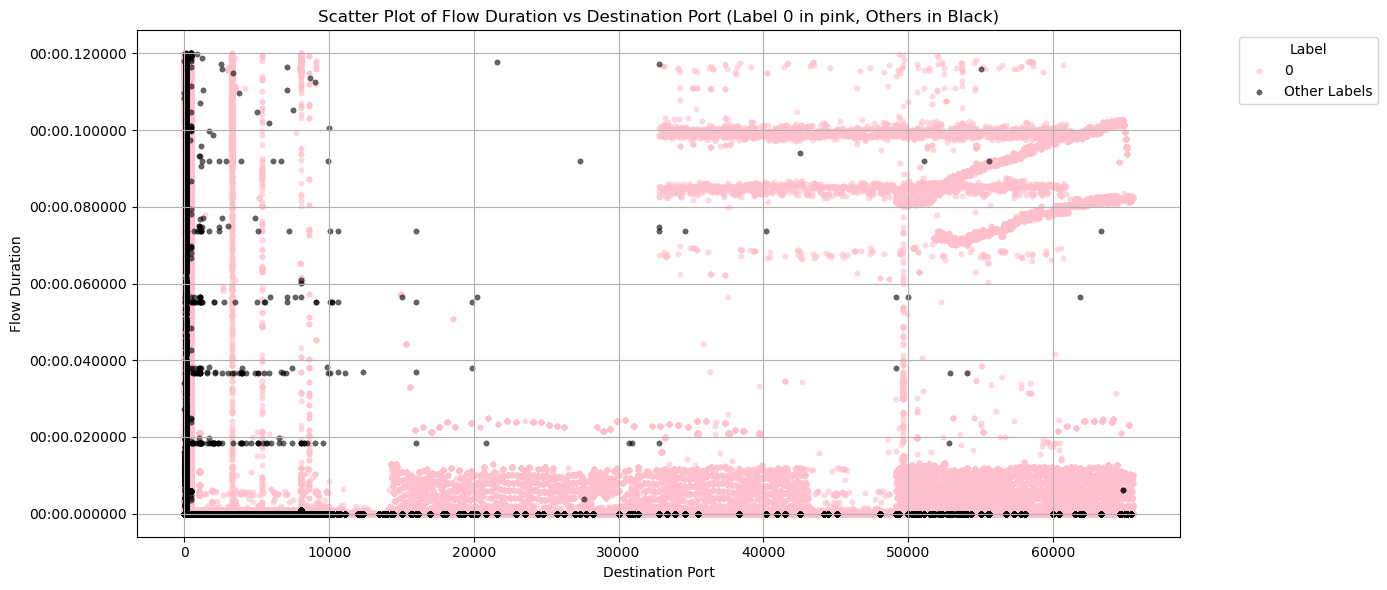

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Ensure label column is string type
new_df['Label'] = new_df['Label'].astype(str)

# Separate Label = '0' from the rest
label_0_df = new_df[new_df['Label'] == '0']
other_labels_df = new_df[new_df['Label'] != '0']

# Plot Label = 0 in grey
sns.scatterplot(
    data=label_0_df,
    x=' Destination Port',
    y=' Flow Duration',
    color='pink',
    label='0',
    s=15,
    alpha=0.6,
    edgecolor=None
)

# Plot other labels in black
sns.scatterplot(
    data=other_labels_df,
    x=' Destination Port',
    y=' Flow Duration',
    color='black',
    label='Other Labels',
    s=15,
    alpha=0.6,
    edgecolor=None
)

# Title and axis labels
plt.title('Scatter Plot of Flow Duration vs Destination Port (Label 0 in pink, Others in Black)')
plt.xlabel('Destination Port')
plt.ylabel('Flow Duration')
plt.grid(True)

# Custom legend
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


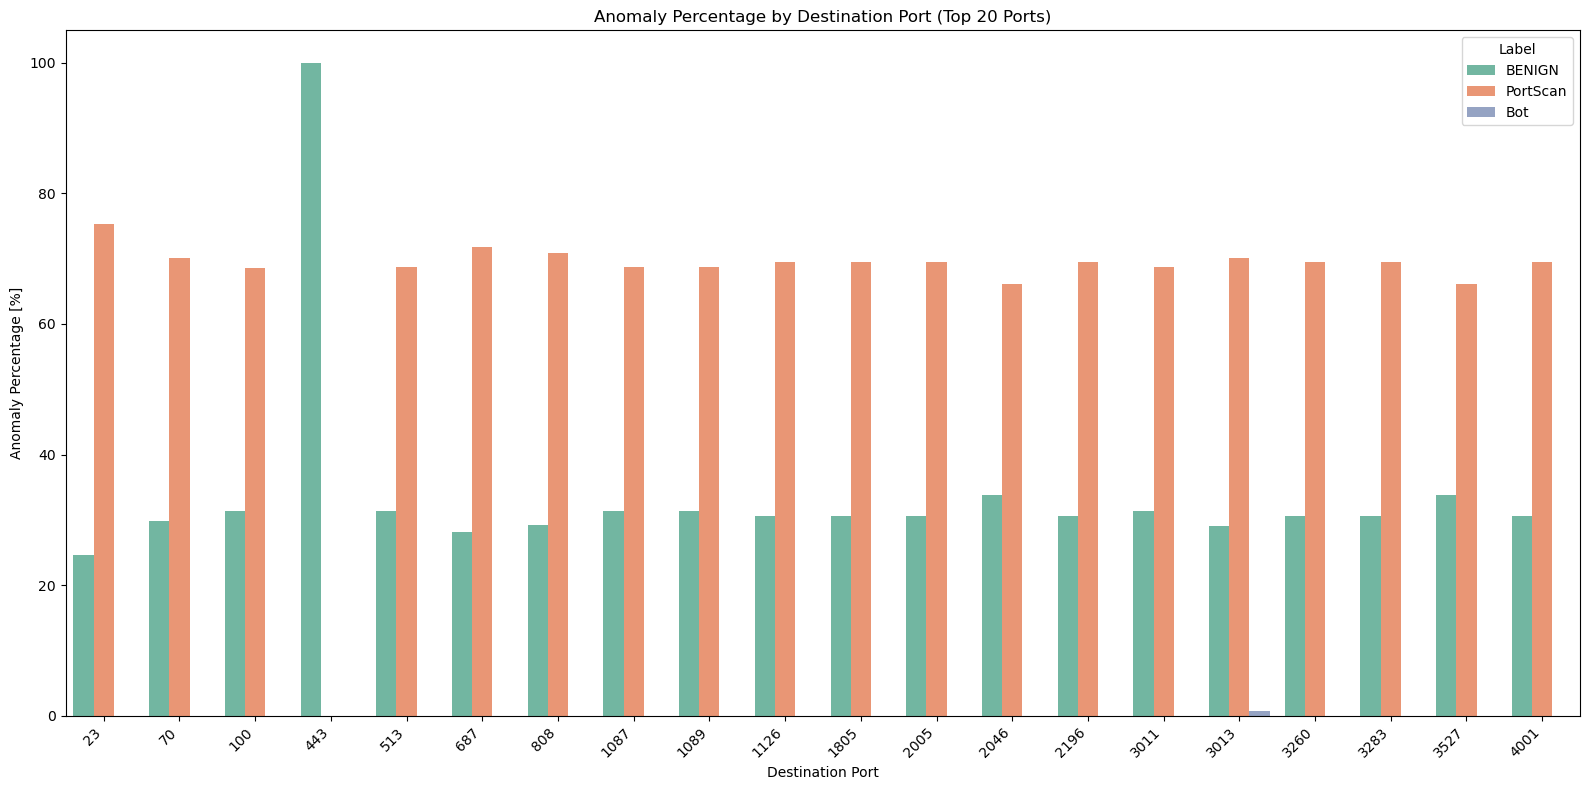

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample structure of your dataframe
# df = pd.read_csv('your_data.csv')

# Step 1: Calculate anomaly percentage for each Destination Port per Label
anomaly_data = (
    df.groupby([' Destination Port', ' Label'])
    .size()
    .reset_index(name='Count')
)

total_per_port = (
    df.groupby([' Destination Port'])
    .size()
    .reset_index(name='Total')
)

# Merge and calculate percentage
merged = pd.merge(anomaly_data, total_per_port, on=' Destination Port')
merged['Anomaly_Percentage'] = (merged['Count'] / merged['Total']) * 100

# Step 2: Filter most significant ports (optional, to avoid clutter)
top_ports = merged.groupby(' Destination Port')['Anomaly_Percentage'].sum().nlargest(20).index
filtered = merged[merged[' Destination Port'].isin(top_ports)]

# Step 3: Plotting
plt.figure(figsize=(16, 8))
sns.barplot(
    data=filtered,
    x=' Destination Port',
    y='Anomaly_Percentage',
    hue=' Label',
    palette='Set2'
)

plt.title('Anomaly Percentage by Destination Port (Top 20 Ports)')
plt.ylabel('Anomaly Percentage [%]')
plt.xlabel('Destination Port')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


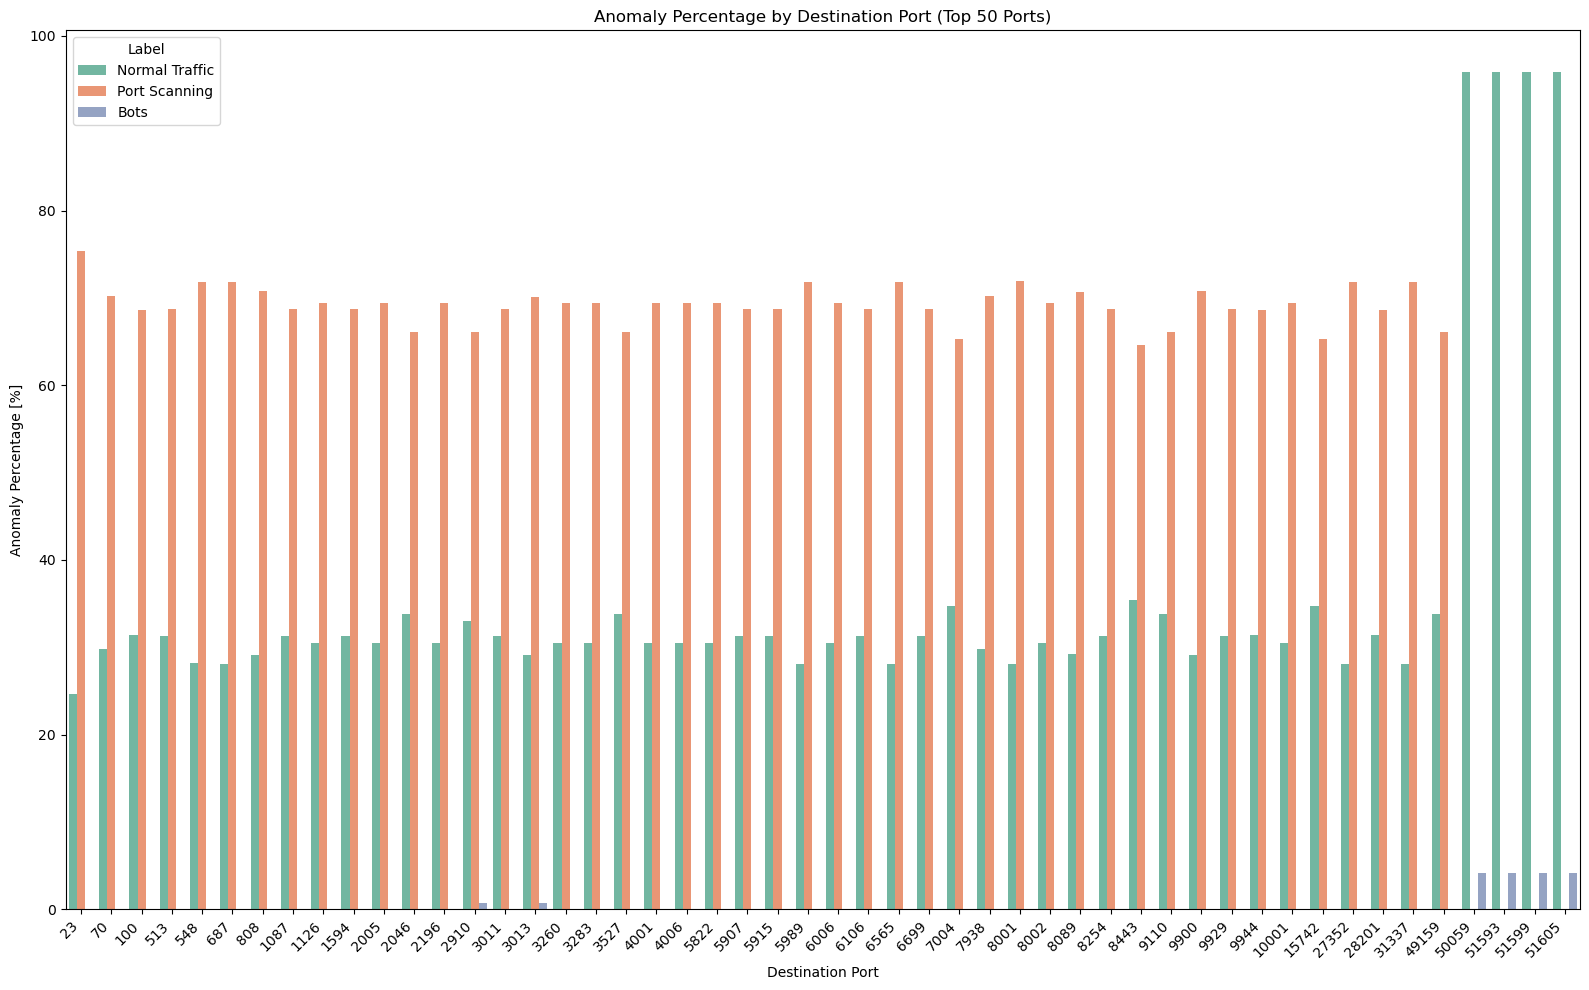

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample structure of your dataframe
# df = pd.read_csv('your_data.csv')

# Step 1: Calculate anomaly percentage for each Destination Port per Label
anomaly_data = (
    new_df.groupby([' Destination Port', ' Label'])
    .size()
    .reset_index(name='Count')
)

total_per_port = (
    new_df.groupby([' Destination Port'])
    .size()
    .reset_index(name='Total')
)

# Merge and calculate percentage
merged = pd.merge(anomaly_data, total_per_port, on=' Destination Port')
merged['Anomaly_Percentage'] = (merged['Count'] / merged['Total']) * 100

# Step 2: Filter most significant ports (optional, to avoid clutter)
top_ports = merged.groupby(' Destination Port')['Anomaly_Percentage'].sum().nlargest(50).index
filtered = merged[merged[' Destination Port'].isin(top_ports)]

# Step 3: Plotting
plt.figure(figsize=(16, 10))
sns.barplot(
    data=filtered,
    x=' Destination Port',
    y='Anomaly_Percentage',
    hue=' Label',
    palette='Set2'
)

plt.title('Anomaly Percentage by Destination Port (Top 50 Ports)')
plt.ylabel('Anomaly Percentage [%]')
plt.xlabel('Destination Port')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()
